# Exercice 1

In [1]:
#IMPORTS

%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state


## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. Instead of using a linear model as in the lecture, use a k-nearest neighbour model.

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.


In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
#print(y)
y = np.take(labels, (y < 10))

#### SOLUTION:

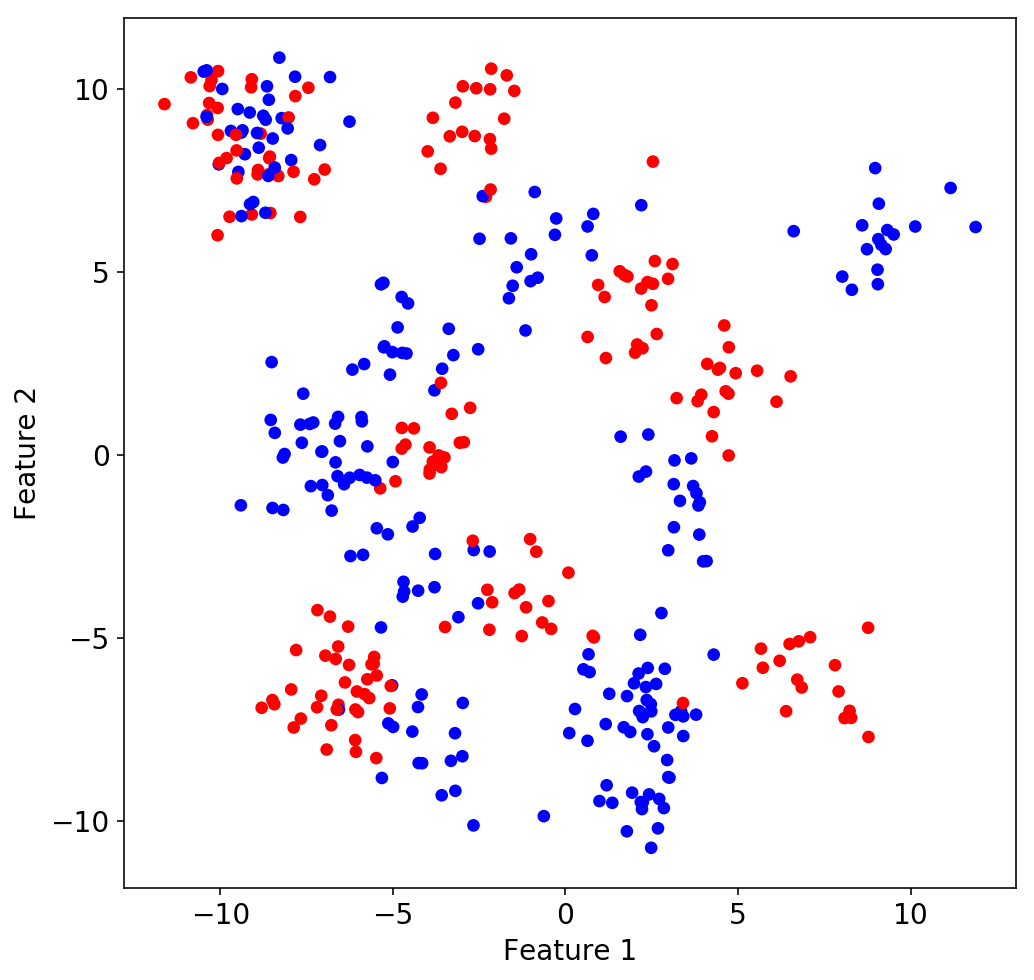

In [3]:
#Dataset plot

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


I split the dataset randomly in two, one will be a training set and the other a testing set. 

In [4]:
#split the dataset into a training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [5]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

# Train of the Classifier on the train sample

clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
#Scores on Test and Train

train_score = clf.score(X_train,y_train)
print("Performance of the classifier on the train set: ",train_score)
print()
test_score = clf.score(X_test,y_test)
print("Performance of the classifier on the test set: ",test_score)

Performance of the classifier on the train set:  0.91

Performance of the classifier on the test set:  0.865


Varying data split:

I will evaluate the performance of the classifier trying different train/test (10-90, 20-80, 30-70 ...) spliting of the dataset:

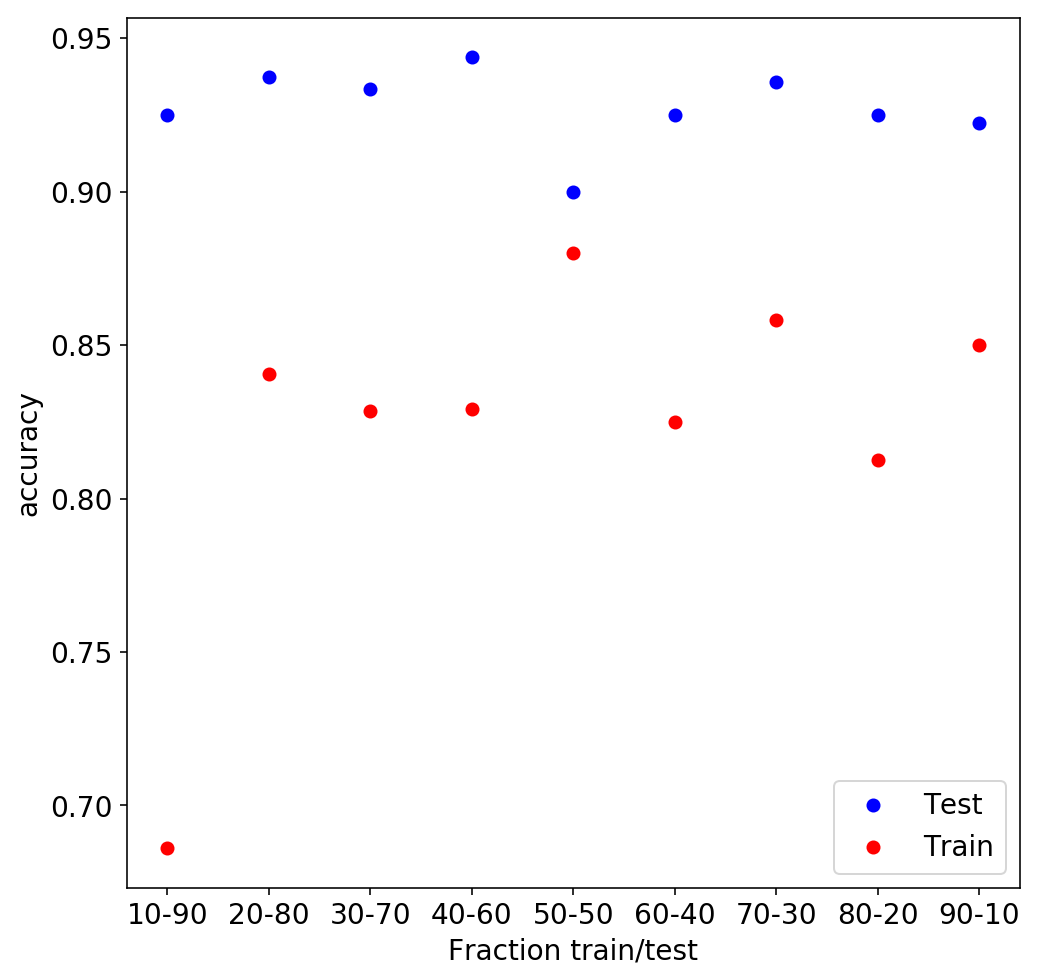

In [7]:
splits = [[i,100-i] for i in range(10,100,10)]

splits = []
s = np.arange(1,10,1)
score_train = []
score_test = []

for i in range(10,100,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i/100)
    clf.fit(X_train, y_train)
    score_train.append(clf.score(X_train,y_train))
    score_test.append(clf.score(X_test,y_test))
    splits.append("{0}-{1}".format(i,100-i))
  
plt.xticks(s,splits)
plt.plot(s, score_train,'bo', label='Test')
plt.plot(s, score_test, 'ro', label='Train')
plt.xlabel('Fraction train/test')
plt.ylabel('accuracy')
plt.legend(loc='best')

    

I see that for different splittings the performances of the classifier on the train and test samples don't change much except for the configuration with 10 % in the train set and 90 % in the test set which gives a bad performance on the test sample (train sample is small so the knowledge of the data is quite poor and its indeed predicatble that classifier do not score well on the test sample).

Now if I had to choose what is the "best" way to split the data I would say to avoid when on the two samples is to small since as the training of the classifier will not be very good it could also increase the uncertainty on the performance value. 

So according to me and what I see from the plot I would keep 50-50 as the best way to split the data. We can look and compare again performances for different ways to split for larger original dataset. 

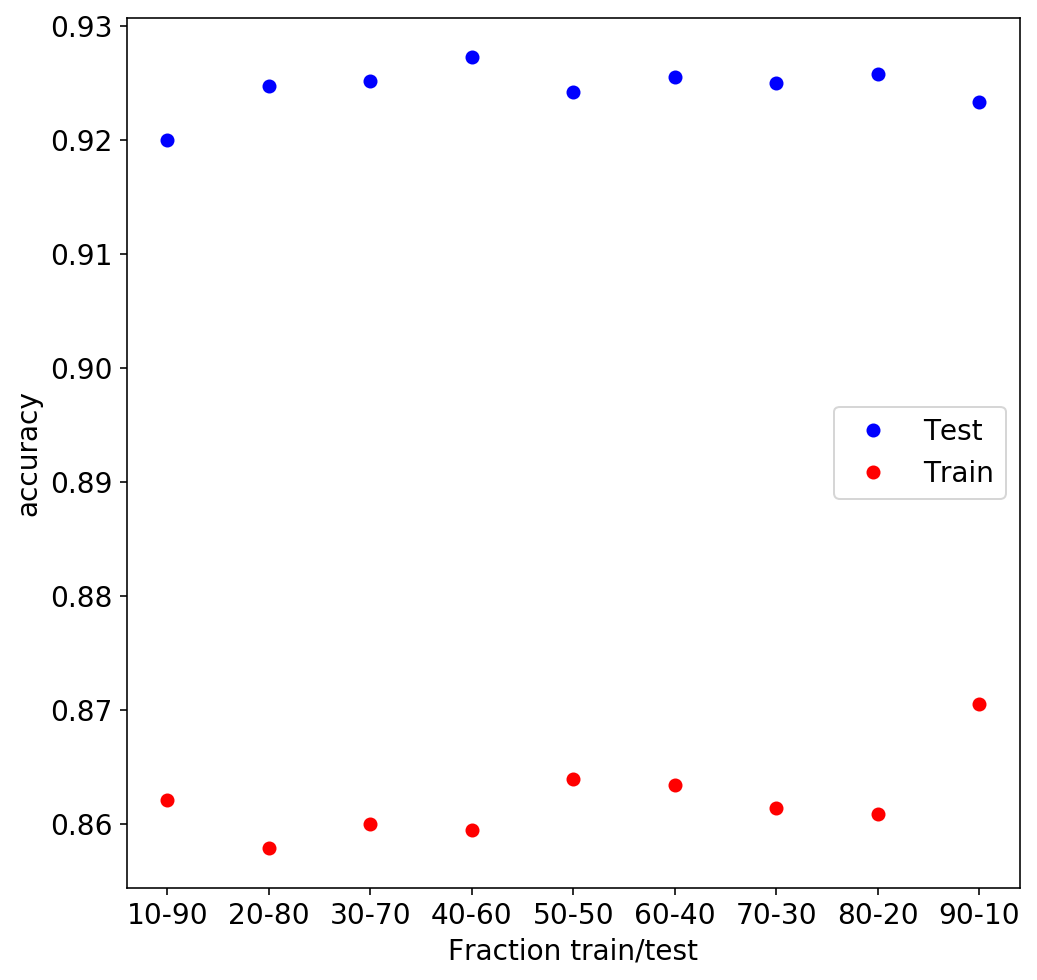

In [8]:
X_ , y_ = make_blobs(n_samples=400*100, centers=23, random_state=35)
y_ = np.take(labels, (y_ < 10))
    
splits = []
s = np.arange(1,10,1)
score_train = []
score_test = []

for i in range(10,100,10):
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=i/100)
    clf.fit(X_train, y_train)
    score_train.append(clf.score(X_train,y_train))
    score_test.append(clf.score(X_test,y_test))
    splits.append("{0}-{1}".format(i,100-i))

plt.xticks(s,splits)
plt.plot(s, score_train,'bo', label='Test')
plt.plot(s, score_test, 'ro', label='Train')
plt.xlabel('Fraction train/test')
plt.ylabel('accuracy')
plt.legend(loc='best')

We see that for a larger dataset all the ways to split are equivalent since the train sample has enough statistics.

Now I will plot the performance of the classifier on the train and test sample using toys, I generate 50 dataset on which I fit the classifier and they I take the average performances on the train and test set for all of them. 

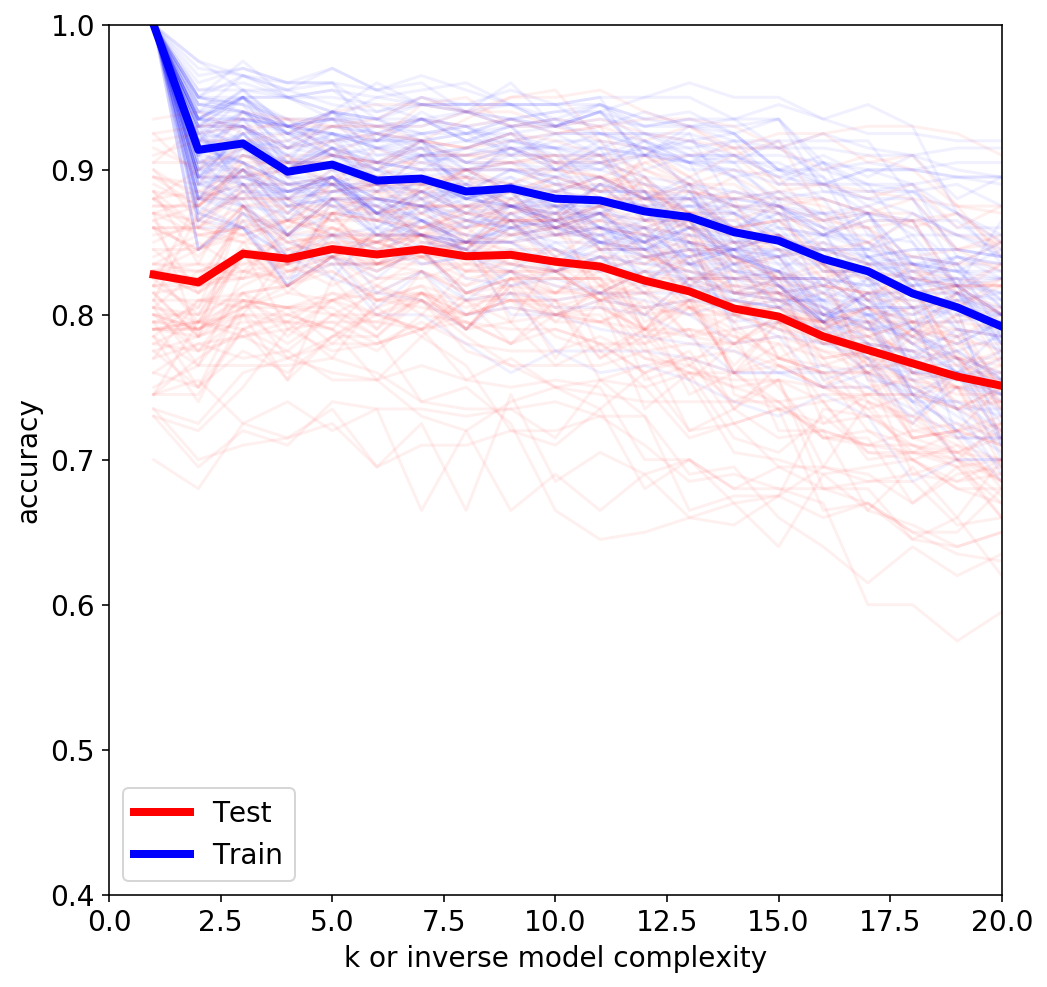

In [9]:
# Plots of the classifier efficiency as the function of n neighbors 

accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for n in range(100):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.06)
    plt.plot(ks, test_scores, c='r', alpha=0.06)
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.4, 1.));

We see that the two accuracy curves for the train and test sample do not have the same values but they do have the same trend (there is a shift between the two curves). For n_neighbors = 1 we see that the performance of the classfier is 1.0 in that case the classifier fits one parameter for each training point. As n_neighbors increases the number of parameters reduces and so the complexity of the model. So a classifier with n_neighbors = 4 or 10 is less complicated than with 3 but we see that between 5 and 10 the perfomances do not change much and is the highest, if we omit 1 because for this configuration the classifier is clearly overtrained (the gap between the performances on train and test sets is larger), thus this would be my best settings for n_neighbors.

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.
* plot your dataset
* fit a kNN regressor with varying number of n_neighbors and compare each regressors predictions to the location of the training and testing points.
* plot the mean squared error of the classifier as a function of n_neighbors for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of n_neighbors for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~n_neighbors=5 to 15 at the value that it does?

Use make_regression() to create the dataset and use KNeighborsRegressor to answer the above questions. Take a look at scikit-learn's metrics module to compute the mean squared error.

In [10]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)

    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

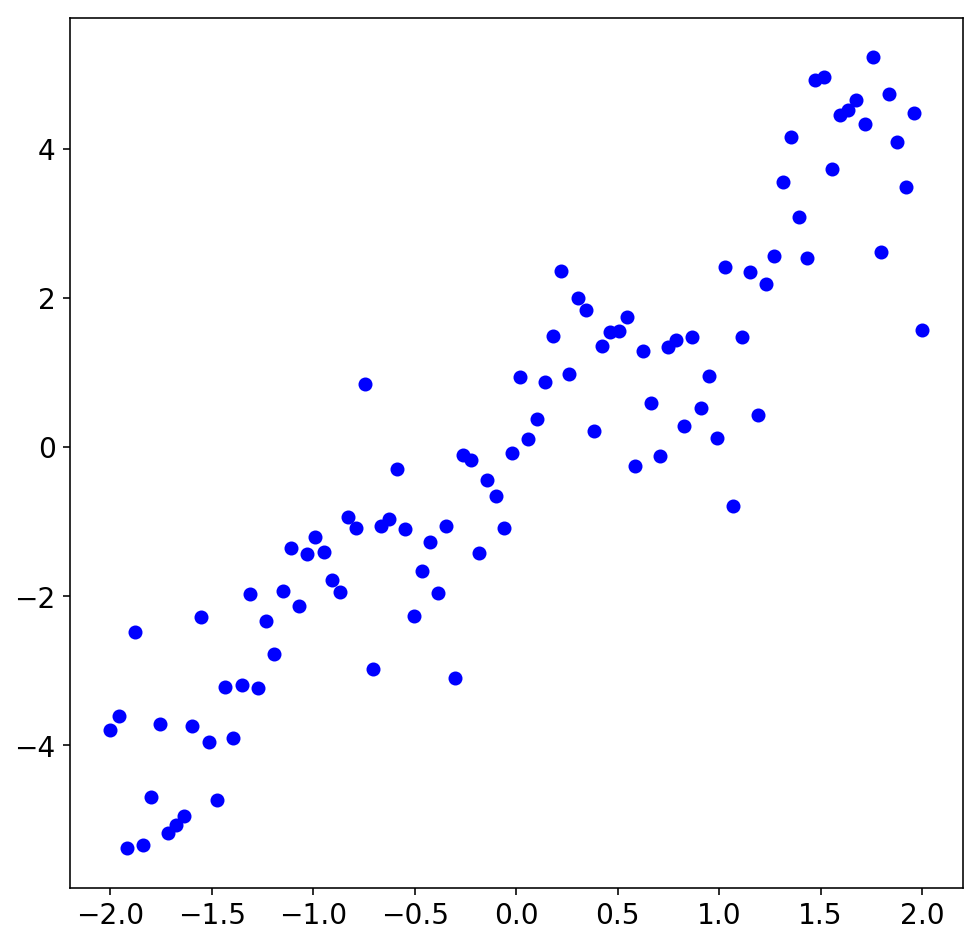

In [11]:
#SOLUTION

X,y = make_regression()
plt.plot(X, y,'bo')

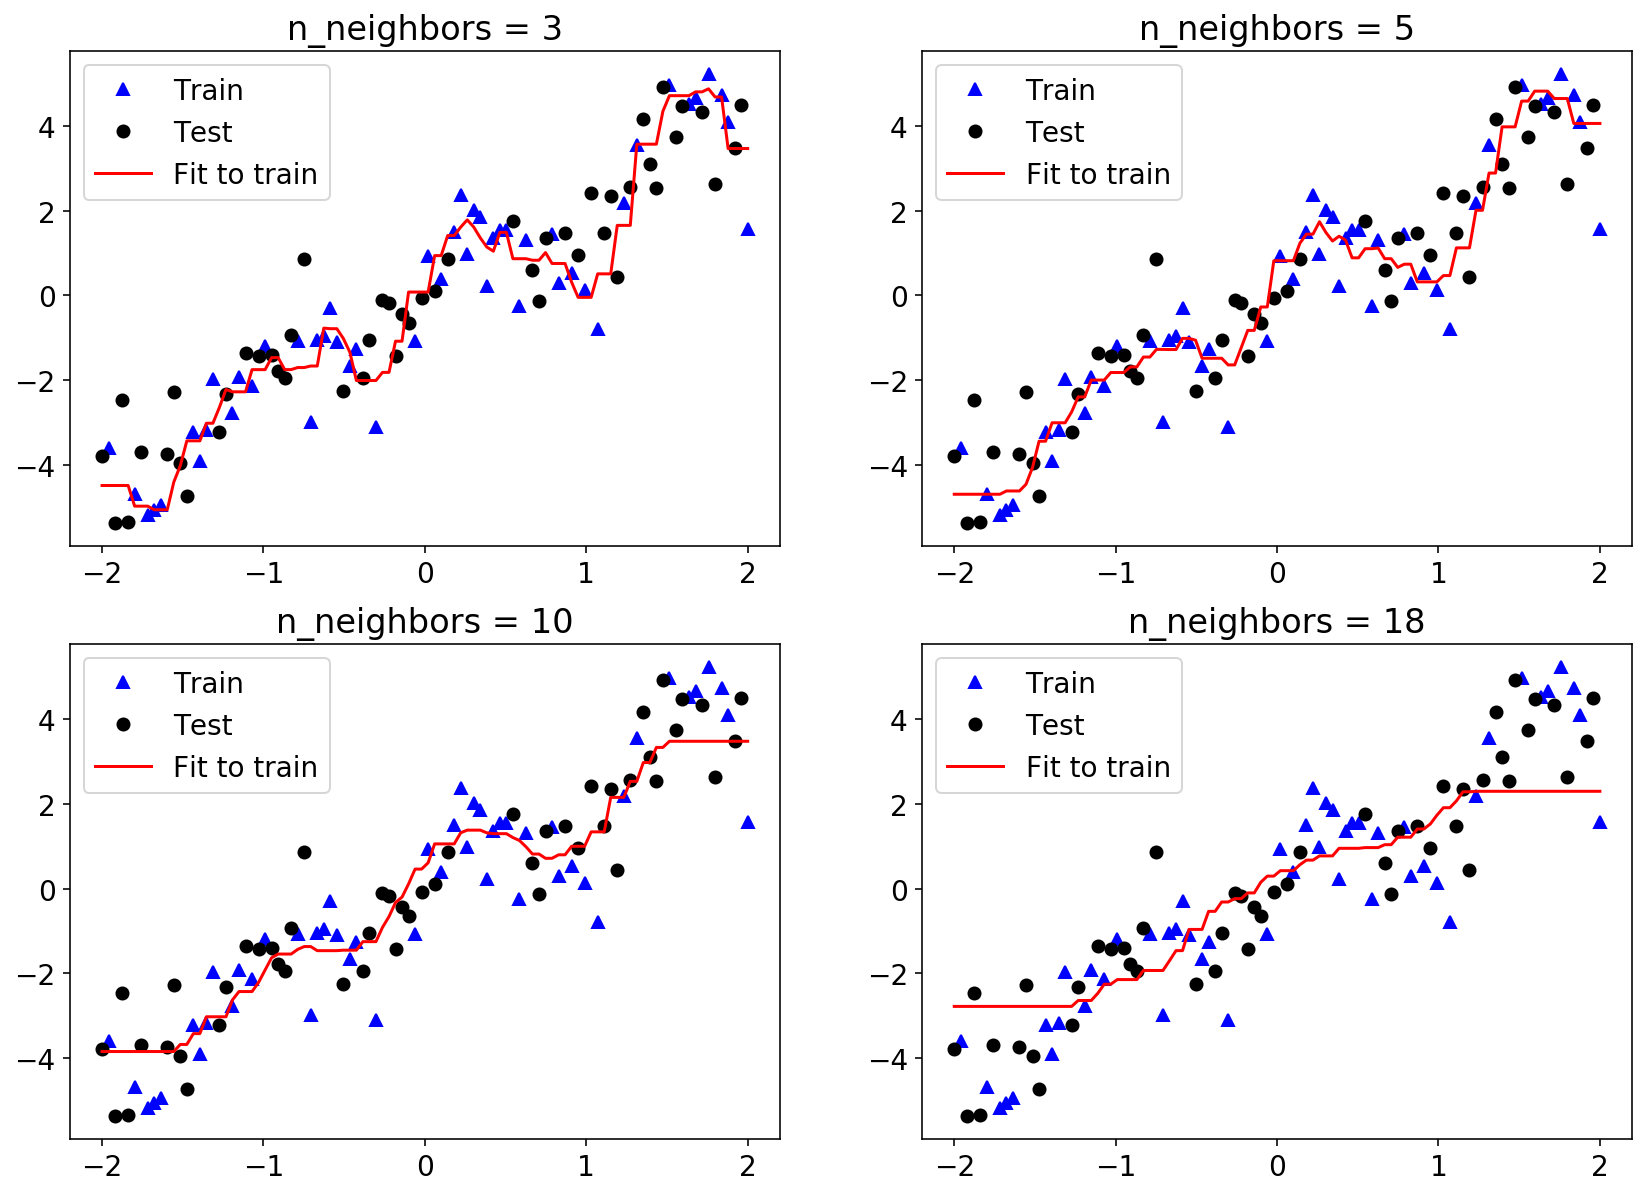

In [12]:
#Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

from sklearn.neighbors import KNeighborsRegressor

# Train of the Classifier on the train sample

plt.rcParams["figure.figsize"] = (14, 10)
f, axarr = plt.subplots(2, 2)
i = [0,0,1,1]
j = [0,1,0,1]

a=0
for ks in [3,5,10,18]:
    knn = KNeighborsRegressor(n_neighbors=ks)
    knn.fit(X_train, y_train)
    line = np.linspace(-2, 2, 100).reshape(-1, 1)
    knn_prediction = knn.predict(line)
    
    axarr[i[a], j[a]].plot(X_train, y_train,'^b', label='Train')
    axarr[i[a], j[a]].plot(X_test, y_test,'ko', label='Test')
    axarr[i[a], j[a]].plot(line, knn_prediction ,'-r',label='Fit to train')
    axarr[i[a], j[a]].legend(loc='best')
    axarr[i[a], j[a]].set_title('n_neighbors = {0}'.format(ks))
    a+= 1

plt.rcParams["figure.figsize"] = (8,8)

We see that further we decrease the complexity of the model (increase n_neighbors) the prediction is from the classifier is less ans less good and becomes almost linear at high n_neighbors.

Let's look now  at the mean squared error of the classifier on the train and test set using toys.

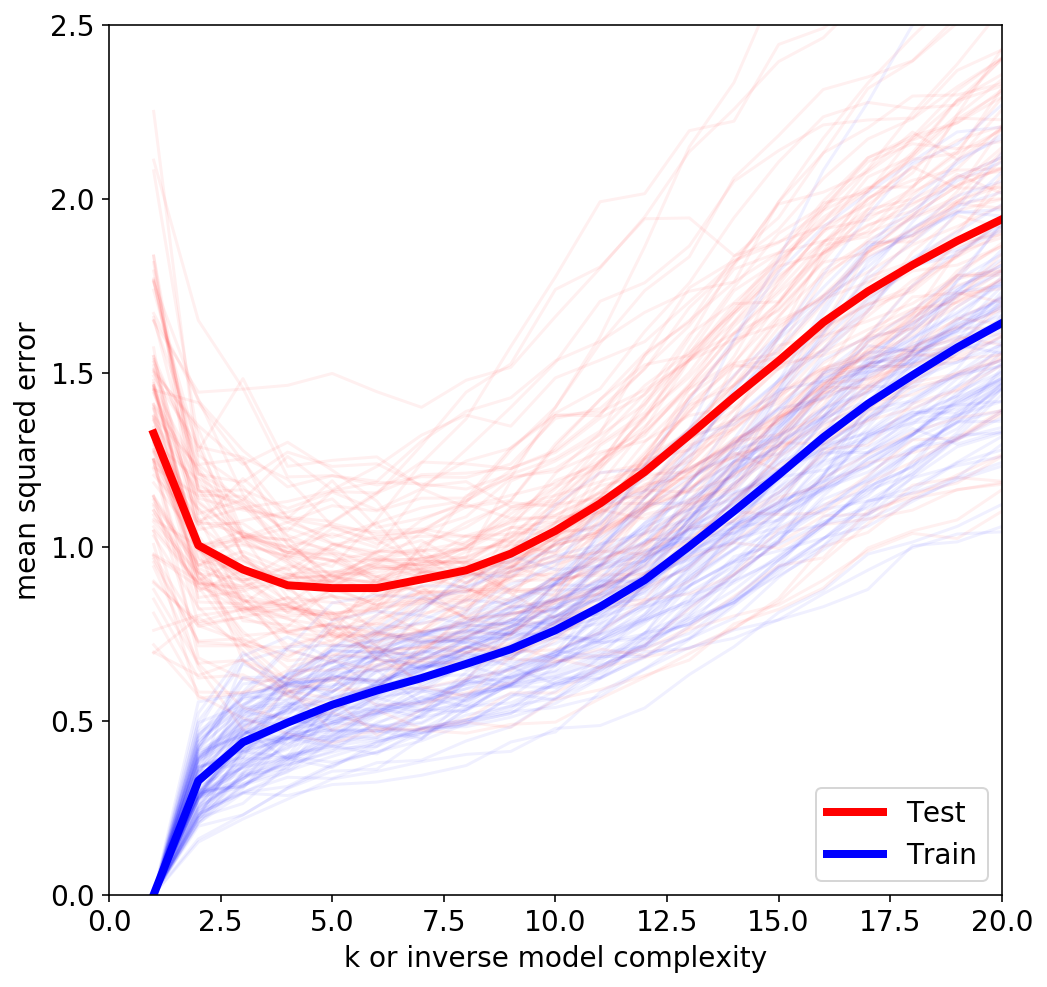

In [13]:
from sklearn.metrics import mean_squared_error
MSE_test = []
MSE_train = []
ks = np.arange(1, 21, 1)

for n in range(100):
    X, y = make_regression(n_samples=100, noise_level=0.8, random_state=2+n)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_MSEs = []
    test_MSEs = []
    for k in ks:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_MSEs.append(mean_squared_error(y_train, knn.predict(X_train)))
        test_MSEs.append(mean_squared_error(y_test, knn.predict(X_test)))
    MSE_test.append(test_MSEs)
    MSE_train.append(train_MSEs)
    
    plt.plot(ks, train_MSEs, c='b', alpha=0.06)
    plt.plot(ks, test_MSEs, c='r', alpha=0.06)
    
plt.plot(ks, np.array(MSE_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(MSE_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('mean squared error')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.0, 2.5));

We observe that mean square error curve for the train and test set are different for low values of n_neighbors, of course the MSE is zero on the train sample for n_neighbors = 1. Then the two distributions are similar above 5 with a shift of about 0.2.

I think that the best settings for n_neigbors would be around n_neigbours = 6 to 8 because it where the MSE curves start to be in agreement and with the lower values for the MSEs. 

There is a plateau from around k_neigbours = 5 to 15 because if you look at the previous plots of the train and test sets and the prediction from the classifier you see that for edge values of X the prediction becomes a horizontal line which increses whith n_neigbours with contributes to increase the mean squared error linearly.

---

## Question 3

Logistic regression. Use a linear model to solve a two class classification problem.

* What is the difference between a linear regression model and a logistic regression model?
* plot your data and split it into a training and test set
* draw your guess for where the decision boundary will be on the plot. Why did you pick this one?
* use the `LogisticRegression` classifier to fit a model to your training data
* extract the fitted coefficients from the model and draw the fitted decision boundary
* create a function to draw the decision surface (the classifier's prediction for every point in space)
* why is the boundary where it is?
* **(bonus)** create new datasets with increasingly larger amounts of noise (increase the `cluster_std` argument) and plot the decision boundary for each case. What happens and why?
* create 20 new datasets by changing the `random_state` parameter and fit a model to each. Visualise the variation in the fitted parameters and the decision boundaries you obtain. Is this a high or low variance model?

Use `make_two_blobs()` to create a simple dataset and use the `LogisticRegression` classifier to answer the above questions.

In [14]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

#### Difference between linear regression and logistic regression:

* *Linear regression model*: Given an observation $X^T = (X_0, X_1, ..., X_p)$ with $p$ inputs, we predict $Y$ using the formula: $$ \hat Y = \hat \beta_0 + \sum_{j=1}^p X_j \hat \beta_j$$ where Y is a continuons dependent variable and $X_j$ are usually continuous.


* *Logistic regression model*: For the logistic regression we use the same basic formula but instead Y is not continuous but represents an outcome, for example if Y is a binary dependent variable it can take only two values, "0" or "1", pass/fail, etc... A logistic regression model for a binary dependent variable predict $$ \ln  \frac{p(X \,| \, Y= 1)}{p(X \, | \, Y = 0)} = \ln  \frac{p(X \,| \, Y= 1)}{1 - p(X \,| \,Y = 1)} = \hat \beta_0 + \sum_{j=1}^p X_j \hat \beta_j$$ where $p(X \,| \,Y )$ is the X  probability distribution given the value of Y.



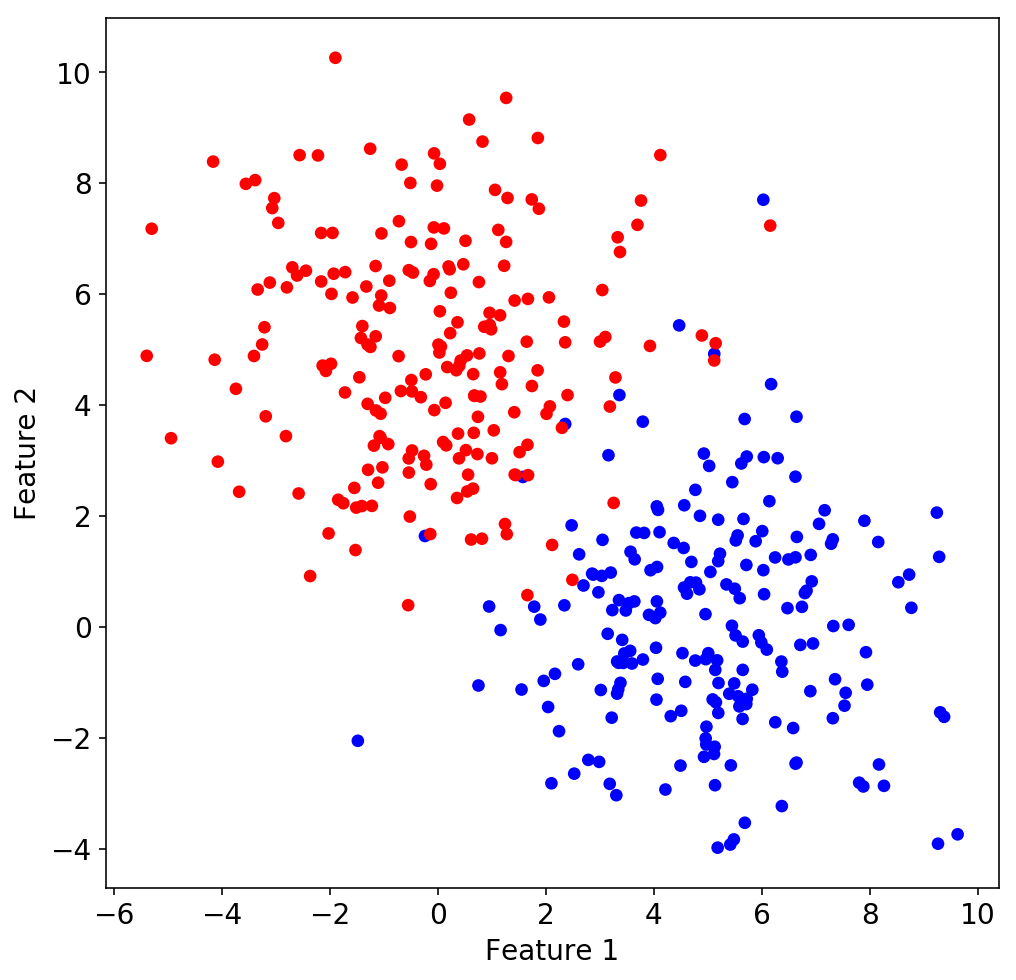

In [15]:
#SOLUTION

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)

From the plot a decision boundary will be a diagonal line which split the dataset in two, with in one part most of the red points and in the other part most of the blue points.

In [16]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

beta0,beta1,beta2 = LR.intercept_[0],LR.coef_[0,0],LR.coef_[0,1]

print('Fitted coefficients:')
print(' beta0: ', beta0)
print(' beta1: ', beta1)
print(' beta2: ', beta2)


Fitted coefficients:
 beta0:  0.148913534068
 beta1:  -1.42792612943
 beta2:  1.37889057225


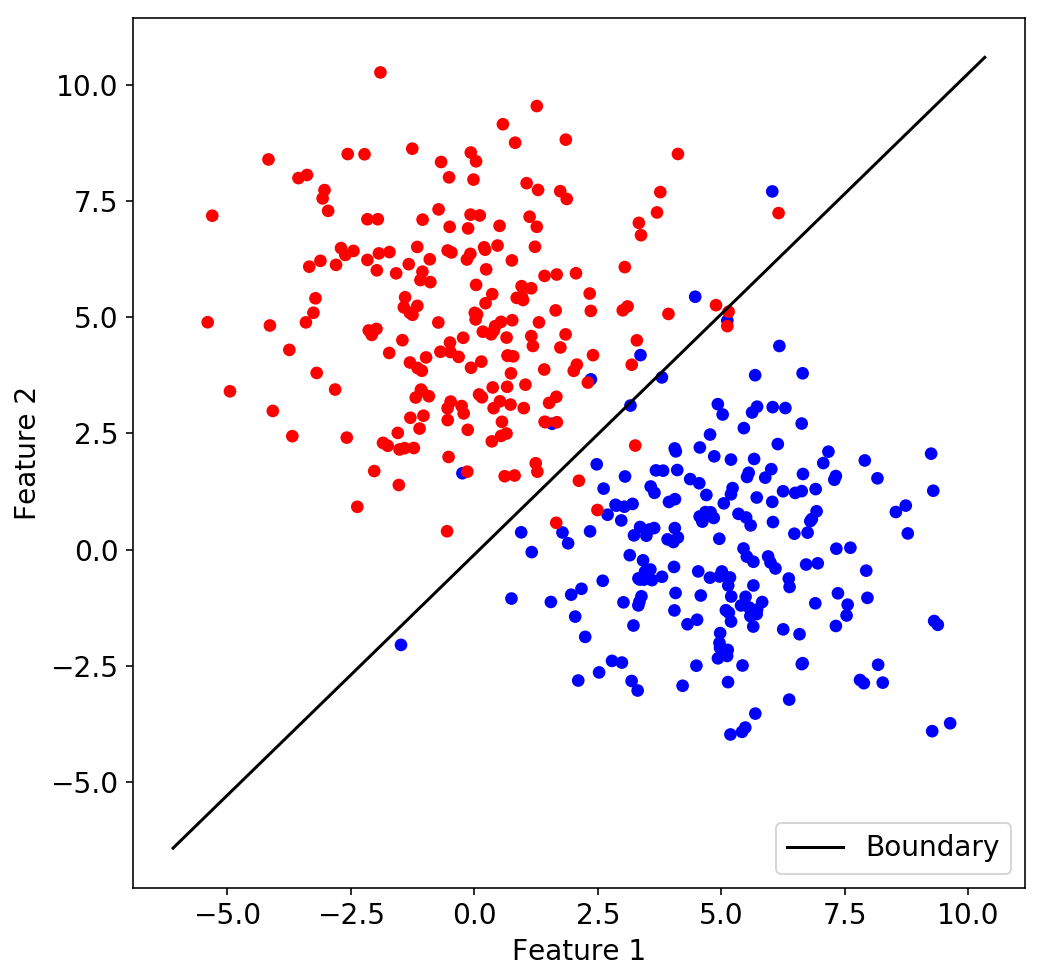

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

def plot_decision_boundary(Classifier,X,Plot=plt):
    
    x1_min, x1_max = X[:, 0].min() - .7, X[:, 0].max() + .7
    x1 = np.linspace(x1_min, x1_max, 100).reshape(-1, 1)

    beta0,beta1,beta2 = Classifier.intercept_[0],Classifier.coef_[0,0],Classifier.coef_[0,1]
    x2 = (-beta0 - beta1*x1)/beta2

    #Plot the boudary
    Plot.plot(x1,x2,"-k",label="Boundary")
    
plot_decision_boundary(LR,X)    
plt.legend(loc='best')



In [18]:
def surface_plot(Classifier,X,y):

    x1_min, x1_max = X[:, 0].min() - .7, X[:, 0].max() + .7
    x2_min, x2_max = X[:, 1].min() - .7, X[:, 1].max() + .7
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    ax = plt.gca()
    Z = Classifier.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:, 1]
    Z = Z.reshape(xx1.shape)
    cs = ax.contourf(xx1, xx2, Z, cmap='RdBu_r', alpha=.3)
    cs2 = ax.contour(xx1, xx2, Z, cmap='RdBu_r', alpha=.3)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
    
    #Plot the boudary    
    plot_decision_boundary(Classifier,X)

    plt.legend(loc='best')

Here is a plot a of the decision surface of the classifier, where the red region denotes the regions where there is a probabilty $p(X \,| \, $**red**$ ) > 0.5$ and the blue region where $p(X \,| \, $**red**$ ) < 0.5$ (equivalently $p(X \,| \, $**blue**$ ) > 0.5$).

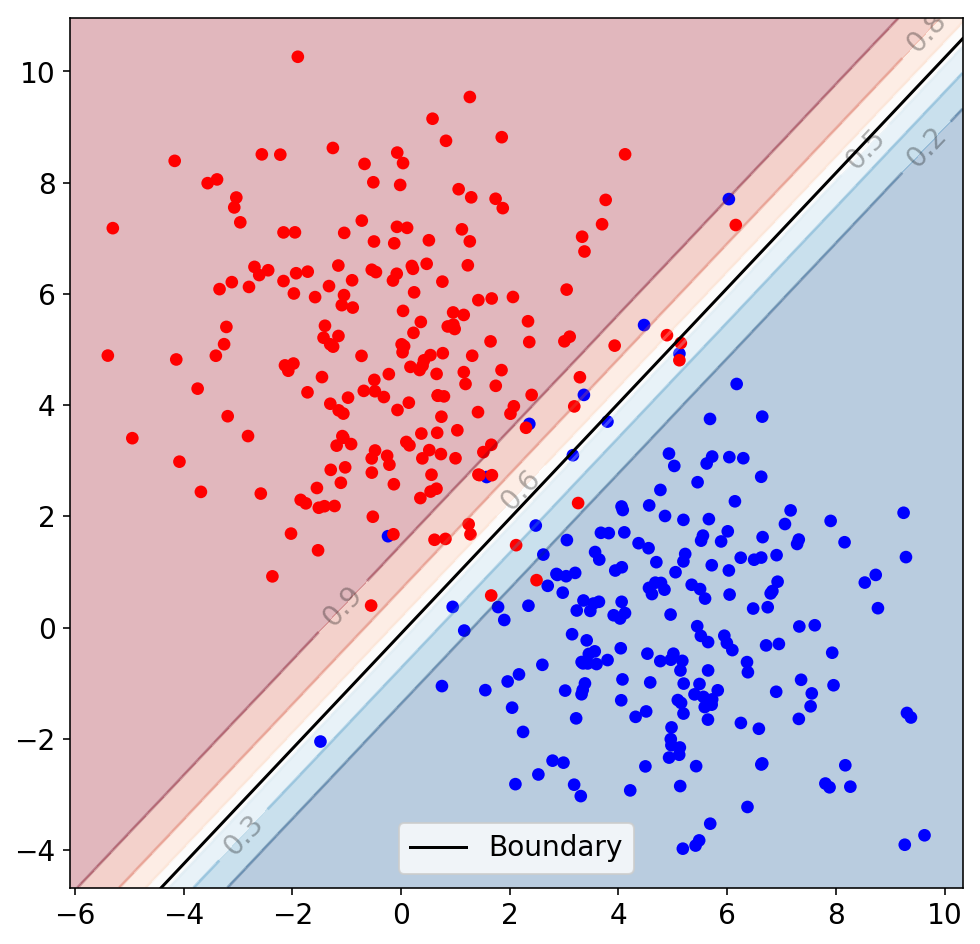

In [19]:
surface_plot(LR,X,y)

We see that the boundary computed before is placed in the region where $p(X \,| \, $**red**$ ) = 0.5$ and $p(X \,| \, $**blue**$ ) = 0.5$ as it has to be.

I'm now creating new datasets with increasingly larger amounts of noise (increase the cluster_std argument) and ploting the decision boundary for each case:

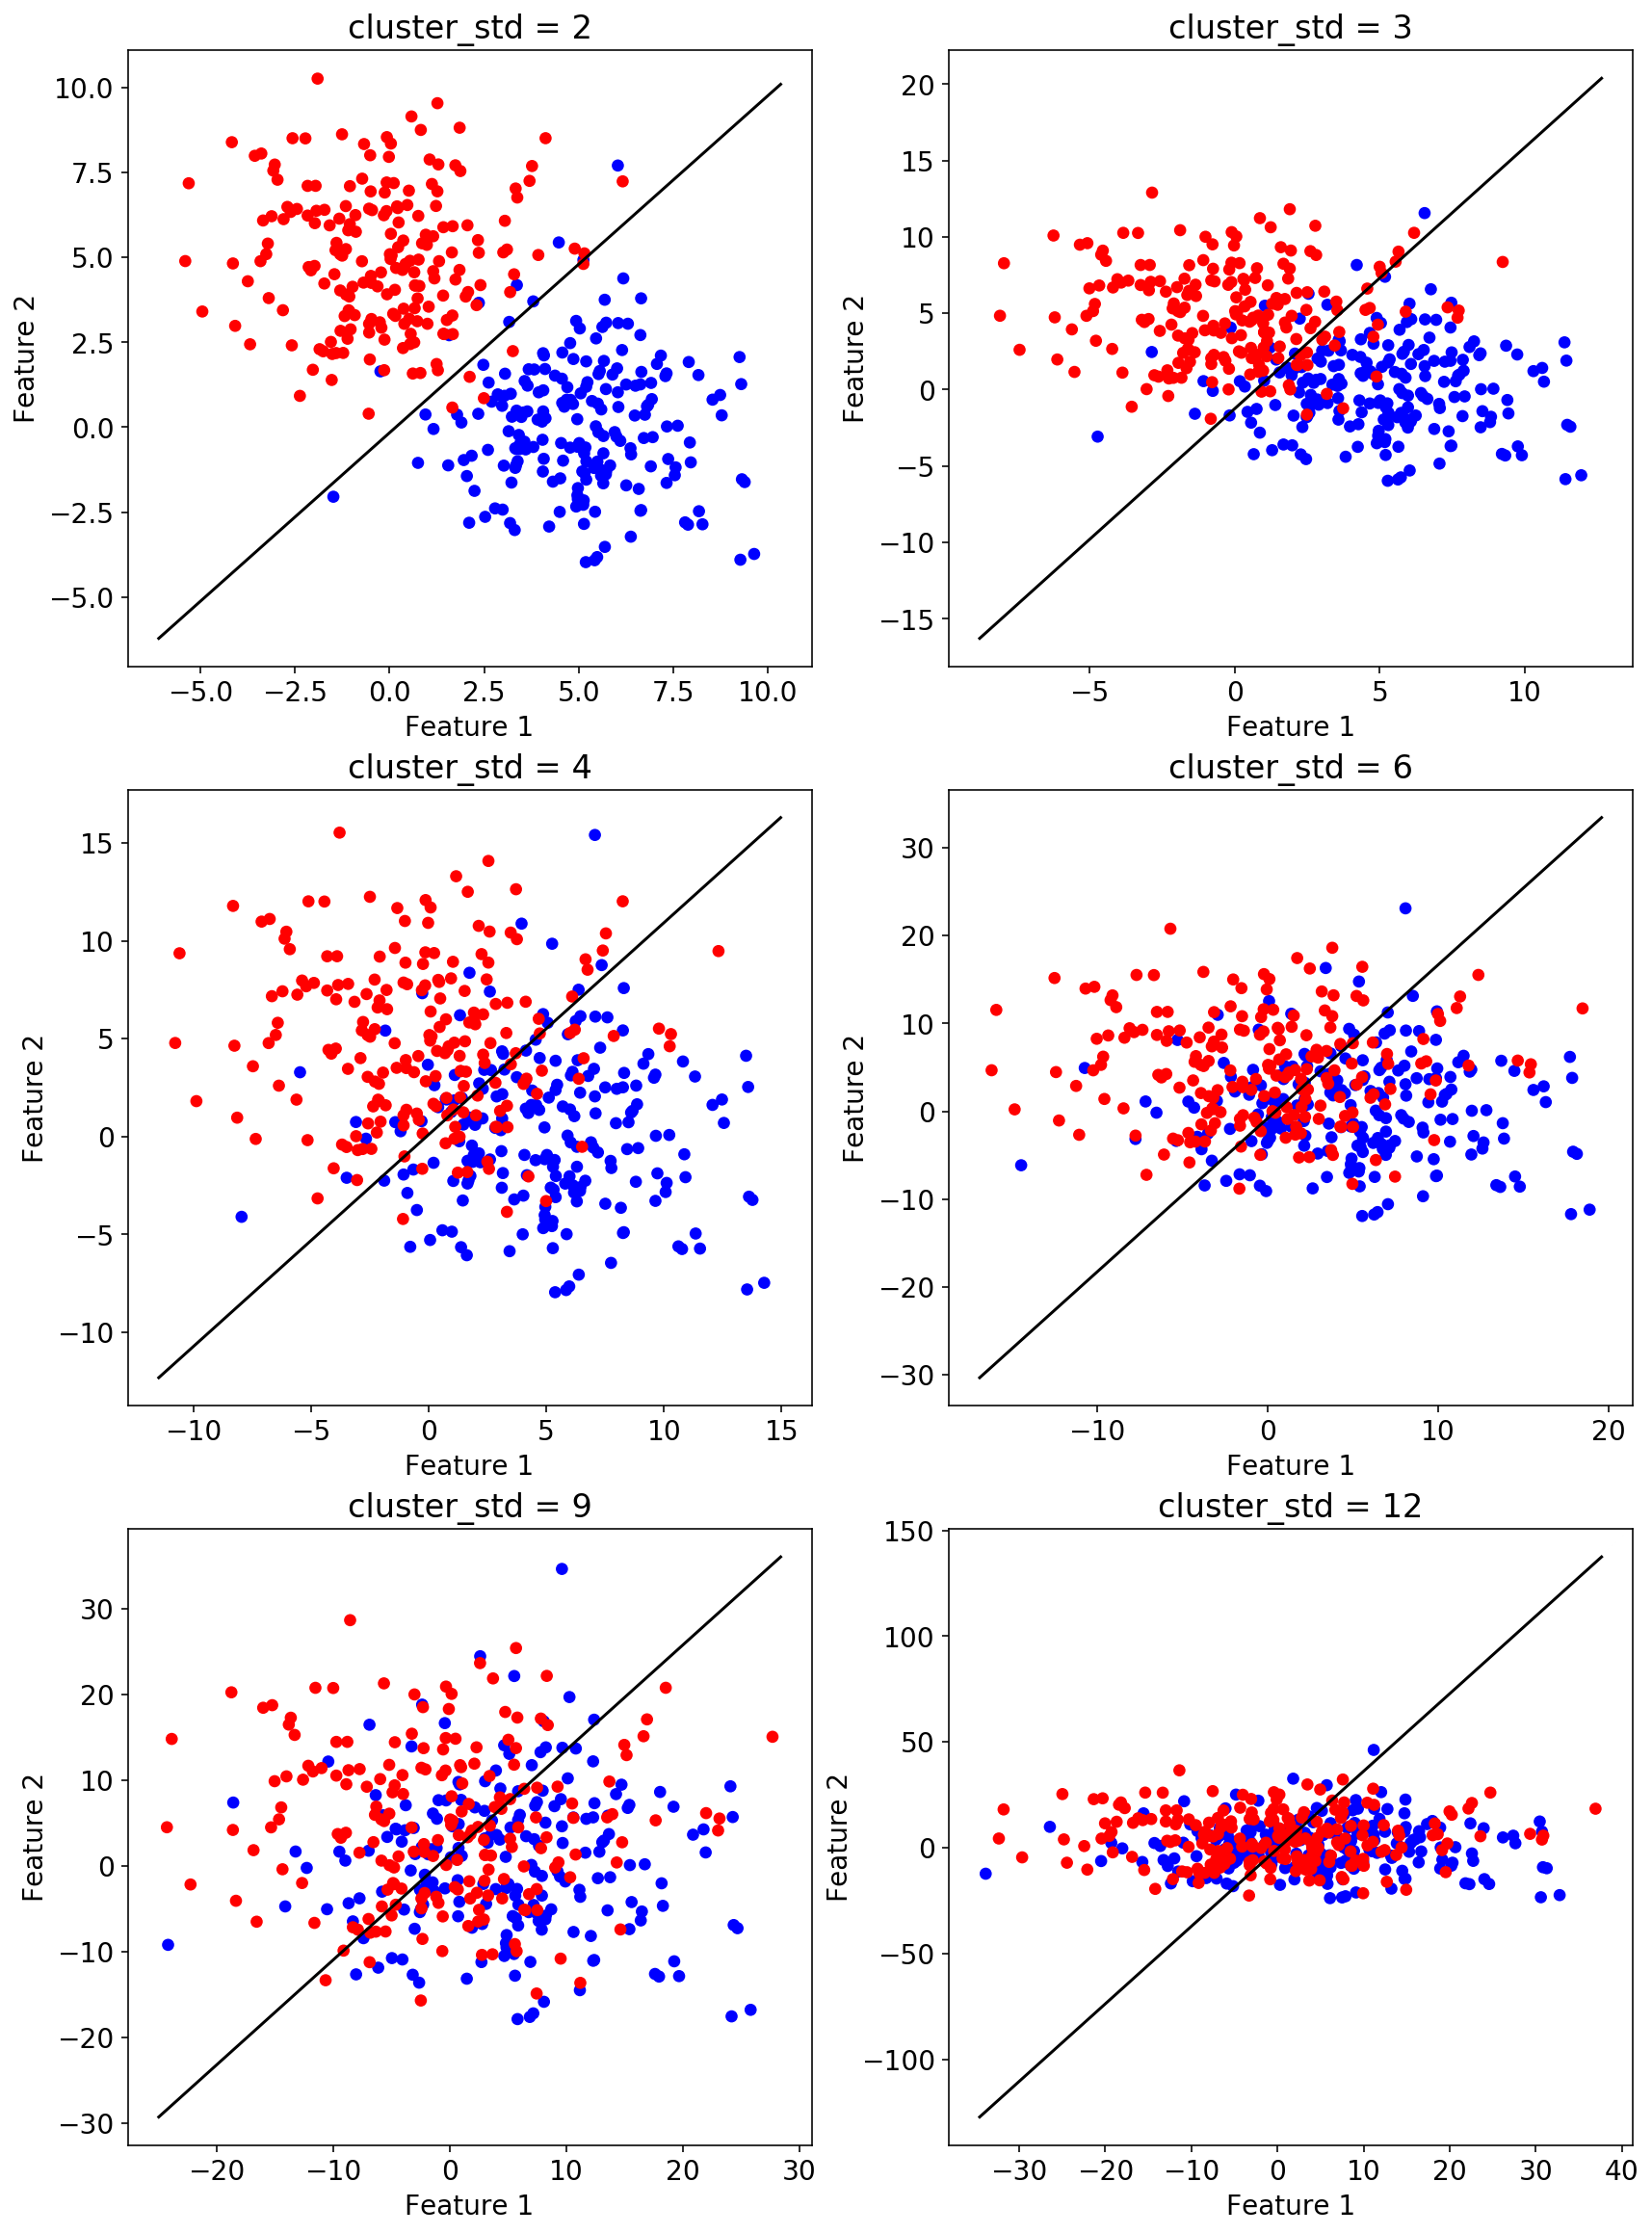

In [20]:
plt.rcParams["figure.figsize"] = (14, 20)
f, axarr = plt.subplots(3, 2)
i = [0,0,1,1,2,2]
j = [0,1,0,1,0,1]

a=0
for n in [2,3,4,6,9,12]:
    X, y = make_two_blobs(cluster_std=n)
    labels = ['b', 'r']
    y = np.take(labels, (y < 0.5))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    LR.fit(X_train,y_train)
    
    axarr[i[a], j[a]].set_xlabel("Feature 1")
    axarr[i[a], j[a]].set_ylabel("Feature 2")
    axarr[i[a], j[a]].scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
    plot_decision_boundary(LR,X,axarr[i[a], j[a]])
    axarr[i[a], j[a]].set_title('cluster_std = {0}'.format(n))
    a+= 1

We see that if we increase the amount of noise you cannot draw anymore a clean boundary between the two categories "red" and "blue" even though you see here a boundary is drawned using the fitted parameter from the classifier, but it's clearly wrong since the two categories are for large amount of noise overlapping.

Now I'm creating 20 new datasets by changing the random_state parameter and fit a model to each:

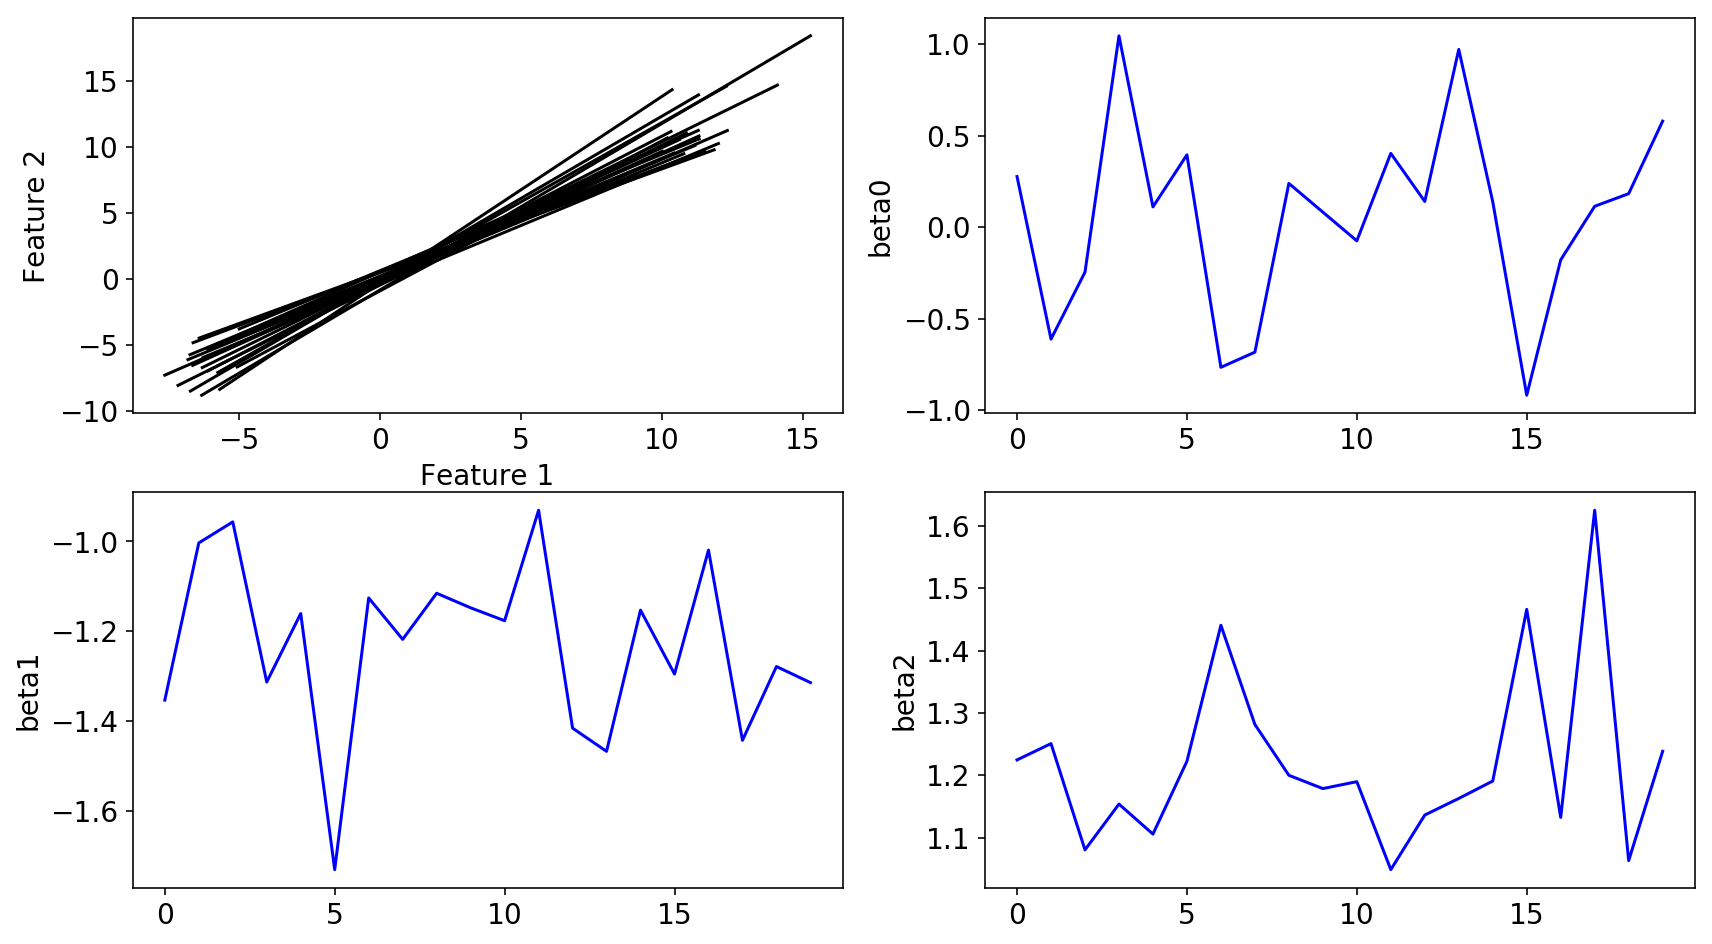

In [21]:
beta0 = []
beta1 = []
beta2 = []

plt.rcParams["figure.figsize"] = (14, 8)
f, axarr = plt.subplots(2, 2)

for n in range(20):
    X, y = make_two_blobs(random_state=42+n)
    labels = ['b', 'r']
    y = np.take(labels, (y < 0.5))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    LR.fit(X_train,y_train)
    
    beta0.append(LR.intercept_[0])
    beta1.append(LR.coef_[0,0])
    beta2.append(LR.coef_[0,1])
    plot_decision_boundary(LR,X,axarr[0,0])
    axarr[0,0].set_xlabel("Feature 1")
    axarr[0,0].set_ylabel("Feature 2")
    
axarr[0,1].plot(beta0,'b-')
axarr[0,1].set_ylabel("beta0")
axarr[1,0].plot(beta1,'b-')
axarr[1,0].set_ylabel("beta1")
axarr[1,1].plot(beta2,'b-') 
axarr[1,1].set_ylabel("beta2")

Looking at those plots we can say that this a high variance model since the fitted parameters fluctuates a lot.

---

## Question 4

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about how you can increase the complexity of a logistic regression model. Visualise the classification
accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

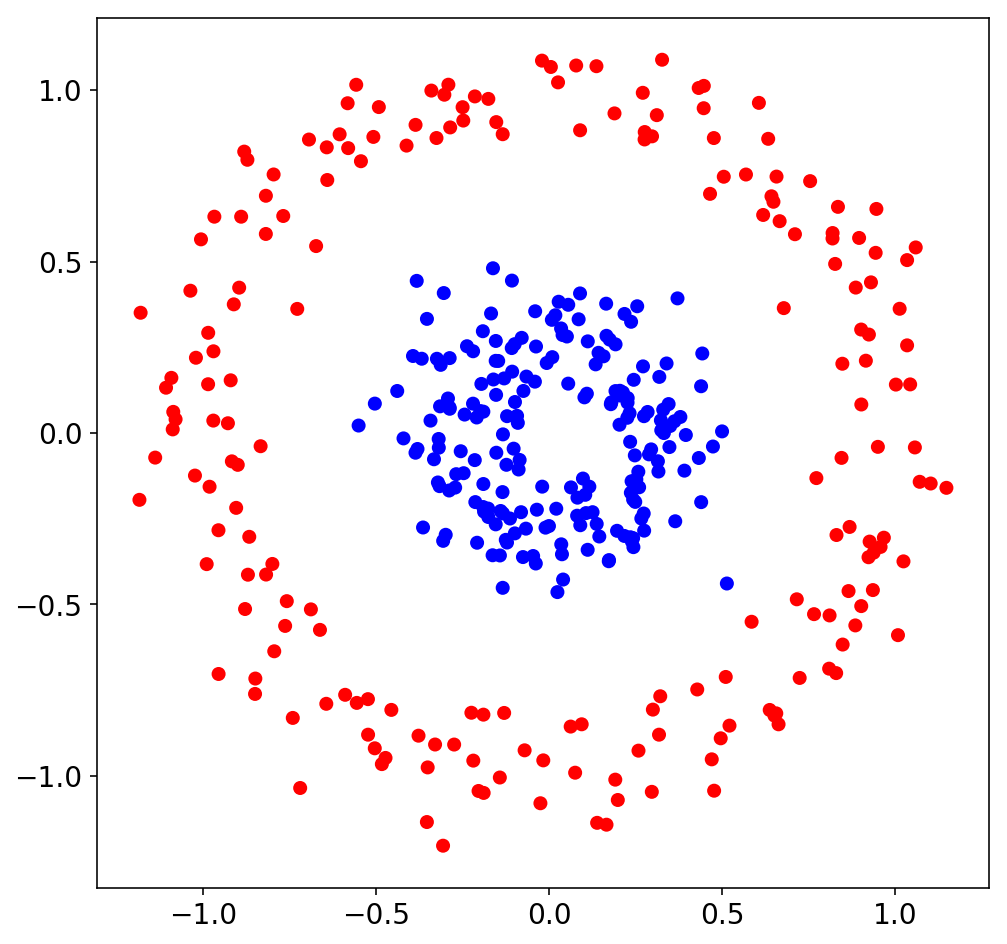

In [22]:
from sklearn.datasets import make_circles
plt.rcParams["figure.figsize"] = (8, 8)

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

def plot_c_boundary(Classifier,X,Plot=plt):
    
    beta00 = Classifier.coef_[0,0]
    beta10 = Classifier.coef_[0,1]
    beta01 = Classifier.coef_[0,2]
    beta20 = Classifier.coef_[0,3]
    beta11 = Classifier.coef_[0,4]
    beta02 = Classifier.coef_[0,5]

    x1_min, x1_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    x2_min, x2_max = X[:, 2].min() - .2, X[:, 2].max() + .2
    x1 = np.linspace(x1_min, x1_max, 1000).reshape(-1, 1)
    x2 = np.linspace(x2_min, x2_max, 1000).reshape(-1, 1)
    
    X1,X2 = np.meshgrid(x1,x2)
    F = beta00 + beta10*X1 + beta01*X2 + beta20*X1**2 + beta11*X1*X2 + beta02*X2**2
    plt.contour(X1,X2,F,[0],label="Boundary",linewidths=3)
    
    
def surface_c_plot(Classifier,X,y):

    n_grid = 1000
    x1_min, x1_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    x2_min, x2_max = X[:, 2].min() - .2, X[:, 2].max() + .2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, n_grid), np.linspace(x2_min, x2_max, n_grid)) 
    xx3 = xx1*xx1
    xx4 = xx1*xx2
    xx5 = xx2*xx2
    xx0 = xx1/xx1
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    ax = plt.gca()
    Z = Classifier.predict_proba(np.c_[xx0.ravel(), xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel(), xx5.ravel()])[:, 1]
    Z = Z.reshape(xx1.shape)
    cs = ax.contourf(xx1, xx2, Z, cmap='RdBu_r', alpha=.3)
    cs2 = ax.contour(xx1, xx2, Z, cmap='RdBu_r', alpha=.3)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)    


How can I increase the complexity of a logistic regression model? We can take a look at the loss function the logistic regressor is minimizing (L2 penalized loss function from the scikit-learn documentation)

$$L(w) = \underset{w, c}{min\,} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$$

where $w$ is the vector of coefficients to be fitted and $C$ is a penalty term which is by default 1. According to the documentation C is the inverse of the regularization strength so smaller values of C means stronger regularization I guess that means less freedom and less complexity. 

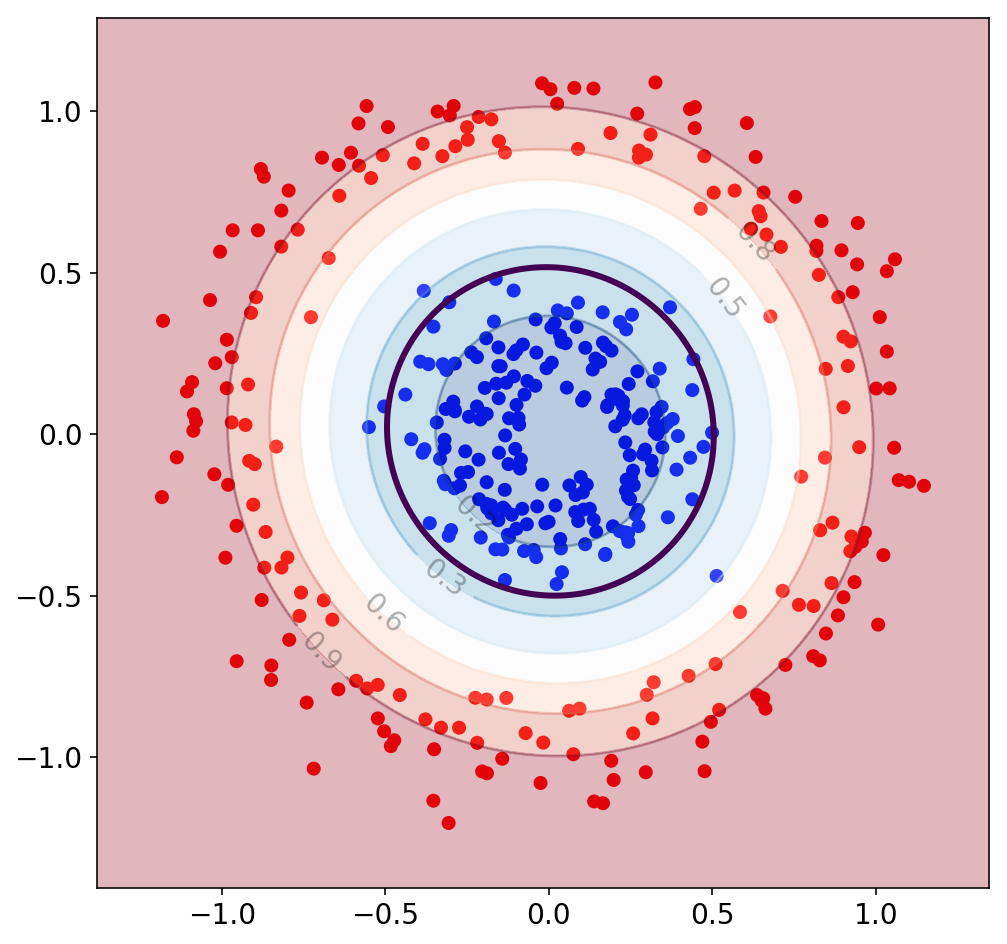

In [24]:
#SOLUTION
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
LR = LogisticRegression(C=1)
LR.fit(X_train,y_train)

plt.scatter(X[:,1], X[:,2], c=y)
plot_c_boundary(LR,X)
surface_c_plot(LR,X,y)


Here I do a decision surface plot of the classifier with the decision boundary and I'm quite surprised that the boundary doesn't lie on the region where the probability is $\frac{1}{2}$.

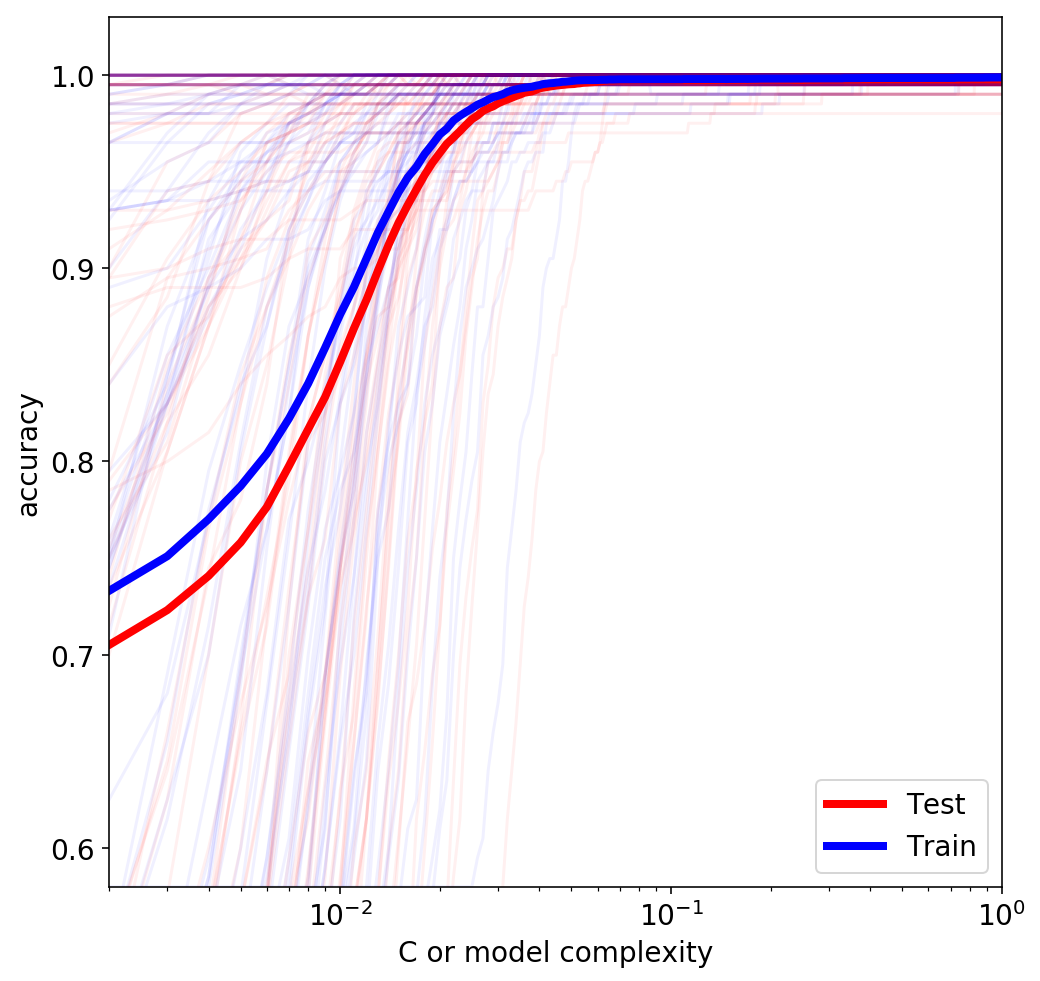

In [32]:
# Plots of the classifier efficiency as the function of C 

accuracies_test = []
accuracies_train = []
Cs = np.arange(1, 0.001, -0.001)

for n in range(100):
    X, y =make_circles(n_samples=400, factor=.3, noise=.1, random_state=24+n)
    y = np.take(labels, (y < 0.5))
    X = poly.fit_transform(X)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for c in Cs:
        LR = LogisticRegression(C=c)
        LR.fit(X_train, y_train)
        train_scores.append(LR.score(X_train, y_train))
        test_scores.append(LR.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.semilogx(Cs, train_scores, c='b', alpha=0.06)
    plt.semilogx(Cs, test_scores, c='r', alpha=0.06)
    
plt.semilogx(Cs, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.semilogx(Cs, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('C or model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(Cs)))
plt.ylim((0.58, 1.03));